# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

import datetime as dt
import re
import string

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

pada langkah awal ini, saya mengimpor semua pustaka yang saya butuhkan: pandas dan numpy untuk mengolah data, matplotlib dan seaborn untuk membuat grafik, tensorflow untuk model deep learning, serta datetime, re, string, dan nltk (beserta modul spesifiknya seperti stopwords, word_tokenize, WordNetLemmatizer, dan PorterStemmer) untuk menangani teks dan tanggal.

In [2]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Setelah itu, saya mengunduh paket punkt (untuk tokenisasi), stopwords (daftar kata umum), dan wordnet (untuk lemmatisasi) dari NLTK agar fungsi-fungsi pemrosesan teks nanti dapat berjalan.

# Data Loading & Cleaning

In [3]:
df = pd.read_csv('ulasan_film_indonesia.csv')

df.head()

,film,pengguna,ulasan,rating
0,Laskar Pelangi,Anonim,I love this so much,4.5 stars
1,Laskar Pelangi,Anonim,Ma kinda childhood movie 🌻,4.0 stars
2,Laskar Pelangi,Anonim,"This movie is just beautiful, touching, inspir...",4.5 stars
3,Laskar Pelangi,Anonim,read the book & watched this in middle school ...,3.0 stars
4,Laskar Pelangi,Anonim,Film legendaris Indonesia yang sangat jelas di...,4.5 stars


Kemudian, saya memuat data dari file 'ulasan_film_indonesia.csv' ke dalam sebuah DataFrame pandas yang saya beri nama df, lalu saya tampilkan lima baris pertama dari df menggunakan df.head() untuk melihat sekilas isi datanya.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15448 entries, 0 to 15447
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   film      15448 non-null  object
 1   pengguna  15448 non-null  object
 2   ulasan    15447 non-null  object
 3   rating    15448 non-null  object
dtypes: object(4)
memory usage: 482.9+ KB


Setelah memuat data, saya menggunakan df.info() untuk mendapatkan ringkasan informasi mengenai DataFrame df.

In [5]:
df.describe(include='all')


,film,pengguna,ulasan,rating
count,15448,15448,15447,15448
unique,10,1,15244,11
top,Pengabdi Setan,Anonim,dan tadi saya melihat film ini dilan itu sebua...,4.0 stars
freq,2400,15448,14,3415


Selanjutnya, saya menggunakan df.describe(include='all') untuk mendapatkan statistik deskriptif dari semua kolom dalam DataFrame df.

In [6]:
df.isna().sum()


,0
film,0
pengguna,0
ulasan,1
rating,0


Kemudian, saya menjalankan df.isna().sum() untuk menghitung jumlah nilai yang hilang atau kosong (NaN) pada setiap kolom di DataFrame df.

In [7]:
df = df.dropna(subset=['ulasan'])


Selanjutnya, saya menghapus baris-baris dari DataFrame df yang memiliki nilai kosong atau hilang (NaN) pada kolom 'ulasan'.

In [8]:
df.duplicated().sum()


np.int64(65)

Setelah menangani nilai yang hilang, saya menghitung dan menampilkan jumlah baris yang merupakan duplikat sempurna di dalam DataFrame df.

In [9]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

<ipython-input-9-da2a6d66ab19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


np.int64(0)

Langkah berikutnya, saya menggunakan df.drop_duplicates(inplace=True) untuk menghapus baris-baris duplikat tersebut secara langsung dari DataFrame df. Setelah itu, saya kembali menjalankan df.duplicated().sum() untuk memastikan bahwa tidak ada lagi baris duplikat yang tersisa.

In [10]:
df['rating'].unique()

array(['4.5 stars', '4.0 stars', '3.0 stars', '5.0 stars',
       'Tidak ada rating', '3.5 stars', '2.5 stars', '2.0 stars',
       '1.5 stars', '1.0 stars', '0.5 stars'], dtype=object)

Kemudian, saya menjalankan df['rating'].unique() untuk melihat semua nilai unik yang ada di dalam kolom 'rating' pada DataFrame df

In [11]:
def convert_rating(rating_str):
    if rating_str == 'Tidak ada rating':
        return np.nan
    score = rating_str[0:3]
    return score

df['numeric_rating'] = df['rating'].apply(convert_rating)
df['numeric_rating'] = pd.to_numeric(df['numeric_rating'], errors='coerce')
df['numeric_rating'] = df['numeric_rating'].fillna(df['numeric_rating'].median())

<ipython-input-11-229f93f3c8e5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['numeric_rating'] = df['rating'].apply(convert_rating)
<ipython-input-11-229f93f3c8e5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['numeric_rating'] = pd.to_numeric(df['numeric_rating'], errors='coerce')
<ipython-input-11-229f93f3c8e5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

Setelah itu, saya membuat fungsi convert_rating untuk mengubah rating teks menjadi angka, menangani "Tidak ada rating" sebagai NaN. Fungsi ini saya terapkan ke kolom 'rating' untuk membuat kolom 'numeric_rating', lalu saya konversi kolom baru ini ke tipe numerik dan mengisi nilai kosong yang ada dengan median kolom tersebut.

In [12]:
df.describe()


,numeric_rating
count,15382.000000
mean,3.492361
std,1.107036
min,0.500000
25%,3.000000
50%,3.500000
75%,4.000000
max,5.000000


Selanjutnya, dengan df.describe(), saya mendapatkan ringkasan statistik (seperti rata-rata, min, max) khusus untuk kolom 'numeric_rating' yang baru saja saya olah.

In [13]:
df.head()

,film,pengguna,ulasan,rating,numeric_rating
0,Laskar Pelangi,Anonim,I love this so much,4.5 stars,4.5
1,Laskar Pelangi,Anonim,Ma kinda childhood movie 🌻,4.0 stars,4.0
2,Laskar Pelangi,Anonim,"This movie is just beautiful, touching, inspir...",4.5 stars,4.5
3,Laskar Pelangi,Anonim,read the book & watched this in middle school ...,3.0 stars,3.0
4,Laskar Pelangi,Anonim,Film legendaris Indonesia yang sangat jelas di...,4.5 stars,4.5


Saya lalu menjalankan df.head() untuk menampilkan lima baris pertama dari DataFrame df. Ini memungkinkan saya untuk melihat hasil dari langkah-langkah pembersihan dan konversi rating yang telah dilakukan, terutama untuk memastikan kolom 'numeric_rating' sudah terisi dengan benar.

# Text Preprocessing

In [14]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin", "u": "you", "ur": "your", "r": "are", "ya": "you", "im": "i am", "ive": "i have", "idk": "i don't know", "lol": "laughing out loud", "omg": "oh my god", "wtf": "what the fuck", "wth": "what the hell", "btw": "by the way", "brb": "be right back", "bbl": "be back later", "ttyl": "talk to you later", "bff": "best friend forever", "tbh": "to be honest", "ikr": "i know right", "lmao": "laughing my ass off", "rofl": "rolling on the floor laughing", "smh": "shaking my head", "fyi": "for your information", "omfg": "oh my freaking god", "bday": "birthday", "thx": "thanks", "ty": "thank you", "np": "no problem", "cuz": "because", "bc": "because", "tho": "though", "ya'll": "you all", "lemme": "let me", "gonna": "going to", "wanna": "want to", "gotta": "got to", "ain't": "is not", "dont": "do not", "cant": "cannot", "couldnt": "could not", "wouldnt": "would not", "shouldnt": "should not", "ain’t": "is not", "nah": "no", "yea": "yeah", "alr": "already", "idc": "i don't care", "nope": "no", "ok": "okay", "k": "okay", "bro": "brother", "sis": "sister", "luv": "love", "hbd": "happy birthday", "ttys": "talk to you soon", "gr8": "great", "2day": "today", "b4": "before", "l8r": "later", "2moro": "tomorrow", "sup": "what's up", "yo": "hello", "oml": "oh my lord", "hmu": "hit me up", "jk": "just kidding", "nvm": "never mind", "atm": "at the moment", "afk": "away from keyboard", "gg": "good game", "gl": "good luck", "hf": "have fun", "irl": "in real life", "rn": "right now", "tf": "the fuck", "tmi": "too much information", "wyd": "what are you doing", "bruh": "bro", "fr": "for real", "cap": "lie", "no cap": "no lie", "bet": "okay", "slay": "do well", "fire": "awesome", "lit": "exciting", "sus": "suspicious", "flex": "show off", "vibe": "atmosphere", "stan": "support", "simp": "overly obsessed", "salty": "bitter", "lowkey": "slightly", "highkey": "definitely", "dead": "laughing hard", "mood": "relatable feeling", "fam": "close friend", "goat": "greatest of all time", "yeet": "throw", "snatched": "stylish", "bussin": "delicious", "fax": "true", "based": "authentic", "ratio": "disagree", "bop": "good song", "cringe": "awkward", "dragged": "criticized", "w": "win", "l": "loss", "mid": "average", "pog": "amazing", "poggers": "awesome", "karen": "entitled woman", "boomer": "old person", "fomo": "fear of missing out", "jomo": "joy of missing out", "ftw": "for the win", "dm": "direct message", "clapback": "witty response", "ghosted": "ignored", "shade": "indirect insult", "cancelled": "boycotted", "drag": "criticize", "thirsty": "desperate", "spill": "reveal", "tea": "gossip", "hot take": "controversial opinion", "ok boomer": "dismissive phrase", "on fleek": "perfect", "woke": "socially aware", "hella": "very", "sksksk": "laughter", "and i oop": "surprise", "periodt": "end of discussion", "yass": "yes", "af": "as fuck", "tfw": "that feeling when", "idgaf": "i don't give a fuck", "tldr": "too long didn't read", "ily": "i love you", "ilysm": "i love you so much", "omw": "on my way", "wbu": "what about you", "gm": "good morning", "gn": "good night", "gtg": "got to go", "ily2": "i love you too", "bffl": "best friends for life"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

Pada langkah ini, saya pertama-tama mendefinisikan sebuah kamus Python bernama slangwords yang berisi daftar kata-kata slang beserta padanan kata bakunya (Baik dalam Bahasa Indonesia maupun Bahasa Inggris). Setelah itu, saya membuat fungsi fix_slangwords yang akan memecah teks input menjadi kata-kata, kemudian untuk setiap kata, fungsi ini akan memeriksa apakah kata tersebut (dalam huruf kecil) ada di dalam kamus slangwords. Jika ada, kata tersebut akan diganti dengan padanan bakunya; jika tidak, kata aslinya akan tetap digunakan, dan hasilnya adalah teks yang sudah dikoreksi kata slangnya.

In [15]:
lemmatizer = WordNetLemmatizer()

def cleaningText(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
  text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
  text = re.sub(r'RT[\s]', '', text) # remove RT
  text = re.sub(r"http\S+", '', text) # remove link
  text = re.sub(r'[0-9]+', '', text) # remove numbers
  text = re.sub(r'[^\w\s]', '', text) # remove numbers


  text = text.replace('\n', ' ') # replace new line into space
  text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
  text = text.strip(' ') # remove characters space from both left and right text
  return text

def casefoldingText(text): # Converting all the characters in a text into lower case
  text = text.lower()
  return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
  text = word_tokenize(text)
  return text

def removeStopwordTextIndo(text): # Removing stopwords from a list of tokens
  stop_words = set(stopwords.words("indonesian"))
  text = [word for word in text if word not in stop_words]
  return text

def removeStopwordTextEng(text): # Removing stopwords from a list of tokens
  stop_words = set(stopwords.words("english"))
  text = [word for word in text if word not in stop_words]
  return text

def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence

Kemudian, saya mendefinisikan berbagai fungsi untuk pra-pemrosesan teks: cleaningText (membersihkan karakter tidak penting), casefoldingText (mengubah ke huruf kecil), tokenizingText (memecah jadi kata), removeStopwordTextIndo dan removeStopwordTextEng (hapus kata umum), fix_slangwords (perbaiki kata slang), dan toSentence (gabung kata jadi kalimat).

In [16]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
df['text_clean'] = df['ulasan'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
df['text_casefoldingText'] = df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
df['text_slangwords'] = df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
df['text_tokenizingText'] = df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
df['text_stopword'] = df['text_tokenizingText'].apply(removeStopwordTextIndo)
df['text_stopword'] = df['text_stopword'].apply(removeStopwordTextEng)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
df['text_akhir'] = df['text_stopword'].apply(toSentence)

Saya kemudian menerapkan semua fungsi pra-pemrosesan teks yang telah dibuat secara bertahap: mulai dari membersihkan teks (text_clean), mengubahnya menjadi huruf kecil (text_casefoldingText), memperbaiki kata slang (text_slangwords), melakukan tokenisasi (text_tokenizingText), menghapus stopwords (text_stopword), hingga akhirnya menggabungkan kembali token menjadi kalimat bersih di kolom 'text_akhir'.

In [17]:
df = df[df['text_akhir'].str.split().apply(len) > 3]

Setelah semua pra-pemrosesan teks selesai, saya melakukan filter pada DataFrame df dengan hanya menyimpan baris-baris di mana kolom 'text_akhir' (setelah dipecah menjadi kata-kata) memiliki lebih dari 3 kata. Ini saya lakukan untuk menghilangkan ulasan yang mungkin terlalu pendek dan kurang informatif untuk analisis sentimen.

In [18]:
df.head()


,film,pengguna,ulasan,rating,numeric_rating,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
2,Laskar Pelangi,Anonim,"This movie is just beautiful, touching, inspir...",4.5 stars,4.5,This movie is just beautiful touching inspirin...,this movie is just beautiful touching inspirin...,this movie is just beautiful touching inspirin...,"[this, movie, is, just, beautiful, touching, i...","[movie, beautiful, touching, inspiring, heartw...",movie beautiful touching inspiring heartwarmin...
3,Laskar Pelangi,Anonim,read the book & watched this in middle school ...,3.0 stars,3.0,read the book watched this in middle school a...,read the book watched this in middle school a...,read the book watched this in middle school an...,"[read, the, book, watched, this, in, middle, s...","[read, book, watched, middle, school, pretty, ...",read book watched middle school pretty wholesome
4,Laskar Pelangi,Anonim,Film legendaris Indonesia yang sangat jelas di...,4.5 stars,4.5,Film legendaris Indonesia yang sangat jelas di...,film legendaris indonesia yang sangat jelas di...,film legendaris indonesia yang sangat jelas di...,"[film, legendaris, indonesia, yang, sangat, je...","[film, legendaris, indonesia, sepenuh, hati, b...",film legendaris indonesia sepenuh hati benarbe...
5,Laskar Pelangi,Anonim,Instead of slamming the door like any other sp...,4.5 stars,4.5,Instead of slamming the door like any other sp...,instead of slamming the door like any other sp...,instead of slamming the door like any other sp...,"[instead, of, slamming, the, door, like, any, ...","[instead, slamming, door, like, spoiled, teena...",instead slamming door like spoiled teenage gir...
6,Laskar Pelangi,Anonim,Film anak-anak yang mengandung banyak sekali p...,4.5 stars,4.5,Film anakanak yang mengandung banyak sekali pe...,film anakanak yang mengandung banyak sekali pe...,film anakanak yang mengandung banyak sekali pe...,"[film, anakanak, yang, mengandung, banyak, sek...","[film, anakanak, mengandung, pesan, moral, nil...",film anakanak mengandung pesan moral nilainila...


Setelah menyaring ulasan pendek, saya kembali menggunakan df.head() untuk menampilkan lima baris pertama dari DataFrame df yang sudah diolah. Ini membantu saya melihat hasil akhir dari semua tahap pra-pemrosesan dan filtering, memastikan data siap untuk tahap pelabelan sentimen.

# Labelling

In [19]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Selanjutnya, saya mengimpor SentimentIntensityAnalyzer dari NLTK VADER dan mengunduh vader_lexicon yang diperlukan untuk analisis sentimen berbasis leksikon.

In [20]:
sia = SentimentIntensityAnalyzer()

text = df['text_akhir'].tolist()
scores = []
for i in text:
    score = sia.polarity_scores(i)
    scores.append(score)

def label_sentiment(score):
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment_score'] = scores
df['sentiment_label'] = df['sentiment_score'].apply(label_sentiment)

Kemudian, saya menginisialisasi SentimentIntensityAnalyzer (sia) dan menggunakannya untuk menghitung skor sentimen VADER untuk setiap teks di kolom 'text_akhir'. Berdasarkan skor gabungan (compound score) ini, saya membuat fungsi label_sentiment untuk melabeli setiap ulasan sebagai 'positive', 'negative', atau 'neutral', lalu menyimpan skor dan label tersebut ke dalam kolom baru 'sentiment_score' dan 'sentiment_label' pada DataFrame df.

In [21]:
df.head()


,film,pengguna,ulasan,rating,numeric_rating,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,sentiment_score,sentiment_label
2,Laskar Pelangi,Anonim,"This movie is just beautiful, touching, inspir...",4.5 stars,4.5,This movie is just beautiful touching inspirin...,this movie is just beautiful touching inspirin...,this movie is just beautiful touching inspirin...,"[this, movie, is, just, beautiful, touching, i...","[movie, beautiful, touching, inspiring, heartw...",movie beautiful touching inspiring heartwarmin...,"{'neg': 0.0, 'neu': 0.366, 'pos': 0.634, 'comp...",positive
3,Laskar Pelangi,Anonim,read the book & watched this in middle school ...,3.0 stars,3.0,read the book watched this in middle school a...,read the book watched this in middle school a...,read the book watched this in middle school an...,"[read, the, book, watched, this, in, middle, s...","[read, book, watched, middle, school, pretty, ...",read book watched middle school pretty wholesome,"{'neg': 0.0, 'neu': 0.652, 'pos': 0.348, 'comp...",positive
4,Laskar Pelangi,Anonim,Film legendaris Indonesia yang sangat jelas di...,4.5 stars,4.5,Film legendaris Indonesia yang sangat jelas di...,film legendaris indonesia yang sangat jelas di...,film legendaris indonesia yang sangat jelas di...,"[film, legendaris, indonesia, yang, sangat, je...","[film, legendaris, indonesia, sepenuh, hati, b...",film legendaris indonesia sepenuh hati benarbe...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
5,Laskar Pelangi,Anonim,Instead of slamming the door like any other sp...,4.5 stars,4.5,Instead of slamming the door like any other sp...,instead of slamming the door like any other sp...,instead of slamming the door like any other sp...,"[instead, of, slamming, the, door, like, any, ...","[instead, slamming, door, like, spoiled, teena...",instead slamming door like spoiled teenage gir...,"{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'comp...",positive
6,Laskar Pelangi,Anonim,Film anak-anak yang mengandung banyak sekali p...,4.5 stars,4.5,Film anakanak yang mengandung banyak sekali pe...,film anakanak yang mengandung banyak sekali pe...,film anakanak yang mengandung banyak sekali pe...,"[film, anakanak, yang, mengandung, banyak, sek...","[film, anakanak, mengandung, pesan, moral, nil...",film anakanak mengandung pesan moral nilainila...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral


Setelah melakukan pelabelan sentimen, saya kembali menjalankan df.head() untuk menampilkan lima baris pertama dari DataFrame. Ini saya lakukan untuk memeriksa apakah kolom 'sentiment_score' dan 'sentiment_label' telah berhasil ditambahkan dan terisi dengan benar sesuai hasil analisis VADER.

# Data Exploration

In [22]:
df['sentiment_label'].value_counts()

,count
sentiment_label,
positive,5620
neutral,3705
negative,2840


Untuk tahap eksplorasi data, saya pertama-tama menggunakan df['sentiment_label'].value_counts() untuk menghitung dan menampilkan jumlah masing-masing label sentimen (positif, netral, dan negatif) yang ada di seluruh dataset. Ini memberikan gambaran awal tentang distribusi kelas sentimen.

In [23]:
print("Laskar Pelangi", df[df['film'] == 'Laskar Pelangi']['sentiment_label'].value_counts())
print("Sang Pemimpi", df[df['film'] == 'Sang Pemimpi']['sentiment_label'].value_counts())
print("The Raid: Redemption", df[df['film'] == 'The Raid: Redemption']['sentiment_label'].value_counts())
print("Habibie & Ainun", df[df['film'] == 'Habibie & Ainun']['sentiment_label'].value_counts())
print("Pengabdi Setan", df[df['film'] == 'Pengabdi Setan']['sentiment_label'].value_counts())
print("Dilan 1990", df[df['film'] == 'Dilan 1990']['sentiment_label'].value_counts())
print("5cm", df[df['film'] == '5cm']['sentiment_label'].value_counts())
print("KKN di Desa Penari", df[df['film'] == 'KKN di Desa Penari']['sentiment_label'].value_counts())
print("Gundala", df[df['film'] == 'Gundala']['sentiment_label'].value_counts())
print("Mencuri Raden Saleh", df[df['film'] == 'Mencuri Raden Saleh']['sentiment_label'].value_counts())

Laskar Pelangi sentiment_label
positive    236
neutral     225
negative     44
Name: count, dtype: int64
Sang Pemimpi sentiment_label
positive    33
neutral     30
negative     5
Name: count, dtype: int64
The Raid: Redemption sentiment_label
positive    1231
negative     747
neutral      249
Name: count, dtype: int64
Habibie & Ainun sentiment_label
neutral     84
positive    81
negative    28
Name: count, dtype: int64
Pengabdi Setan sentiment_label
positive    883
negative    708
neutral     414
Name: count, dtype: int64
Dilan 1990 sentiment_label
positive    475
neutral     365
negative    180
Name: count, dtype: int64
5cm sentiment_label
positive    478
neutral     404
negative    161
Name: count, dtype: int64
KKN di Desa Penari sentiment_label
neutral     753
positive    493
negative    471
Name: count, dtype: int64
Gundala sentiment_label
positive    731
neutral     486
negative    269
Name: count, dtype: int64
Mencuri Raden Saleh sentiment_label
positive    979
neutral     695
neg

Saya kemudian mencetak jumlah ulasan positif, netral, dan negatif untuk setiap film secara individual. Output menunjukkan bahwa, sebagai contoh, "Laskar Pelangi" memiliki 236 ulasan positif, 225 netral, dan 44 negatif. Film "The Raid: Redemption" mendapatkan sentimen positif yang sangat tinggi (1231 ulasan) namun juga sentimen negatif yang cukup banyak (747 ulasan), sementara "KKN di Desa Penari" didominasi oleh sentimen netral (753 ulasan) dengan jumlah sentimen positif dan negatif yang hampir seimbang.

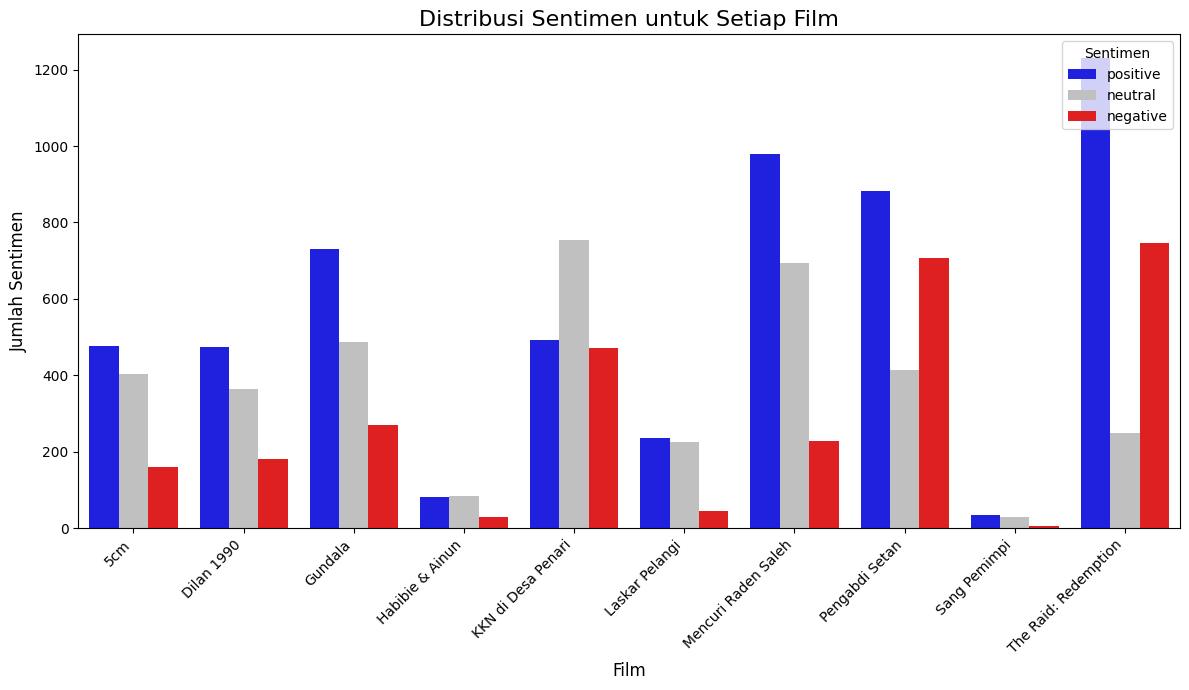

In [24]:
films = [
    'Laskar Pelangi', 'Sang Pemimpi', 'The Raid: Redemption', 'Habibie & Ainun',
    'Pengabdi Setan', 'Dilan 1990', '5cm', 'KKN di Desa Penari',
    'Gundala', 'Mencuri Raden Saleh'
]
filtered_df = df[df['film'].isin(films)]
sentiment_counts = filtered_df.groupby(['film', 'sentiment_label']).size().reset_index(name='count')

custom_palette = {
    'positive': 'blue',
    'negative': 'red',
    'neutral': 'silver'
}


hue_order = ['positive', 'neutral', 'negative']

plt.figure(figsize=(12, 7))
sns.barplot(
    data=sentiment_counts,
    x='film',
    y='count',
    hue='sentiment_label',
    palette=custom_palette,
    hue_order=hue_order
)
plt.title('Distribusi Sentimen untuk Setiap Film', fontsize=16)
plt.xlabel('Film', fontsize=12)
plt.ylabel('Jumlah Sentimen', fontsize=12)
plt.legend(title='Sentimen', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Untuk memvisualisasikan distribusi sentimen per film, saya memfilter data yang relevan, menghitung jumlah sentimen (positif, netral, negatif) untuk setiap film, lalu membuat bar plot menggunakan seaborn dengan palet warna khusus. Plot menunjukkan bahwa film seperti "The Raid: Redemption" dan "Mencuri Raden Saleh" didominasi ulasan positif, sedangkan "KKN di Desa Penari" memiliki ulasan netral terbanyak.

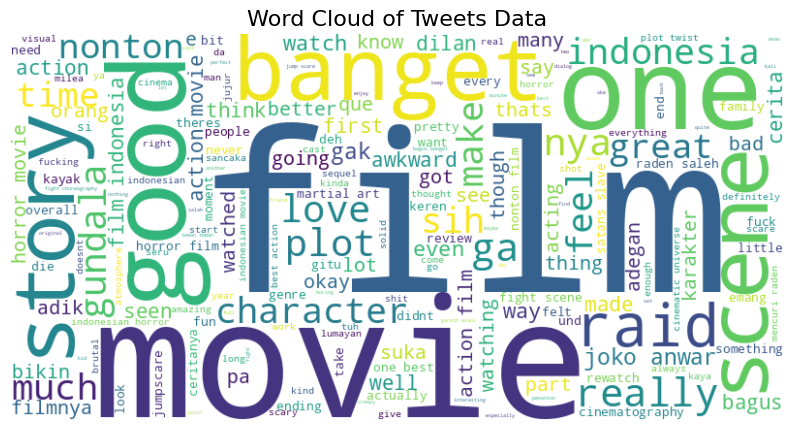

In [25]:
from wordcloud import WordCloud

all_text = ' '.join(df['text_akhir'].astype(str).tolist())

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', contour_color='black').generate(all_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweets Data', fontsize=16)
plt.show()

Setelah itu, saya membuat word cloud dari semua teks ulasan di kolom 'text_akhir' untuk memvisualisasikan kata-kata yang paling sering muncul. Dari gambar, terlihat kata-kata seperti "film", "banget","good", dan sebagainya dapat terlihat pada word cloud tersebut, menunjukkan fokus ulasan pada aspek film secara umum, alur cerita, dan ekspresi intensitas perasaan.

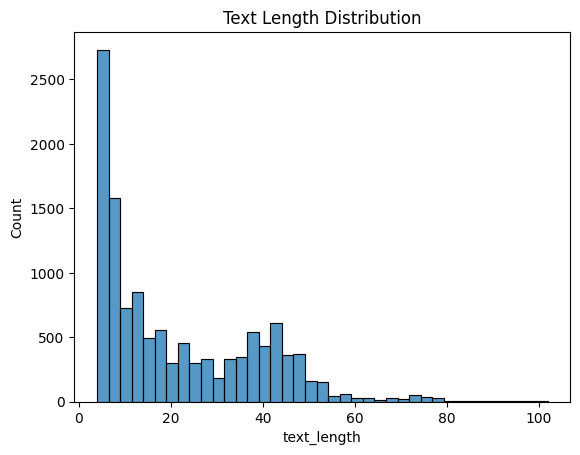

In [26]:
df['text_length'] = df['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(df['text_length'])
plt.title('Text Length Distribution')
plt.show()

Saya menghitung panjang setiap ulasan dan membuat kolom 'text_length', lalu membuat histogramnya. Plot menunjukkan mayoritas ulasan cukup pendek, dengan puncak sekitar 5-10 kata, dan jumlahnya menurun seiring bertambahnya panjang, meski ada sedikit peningkatan lagi di sekitar 40-45 kata.


Sumber


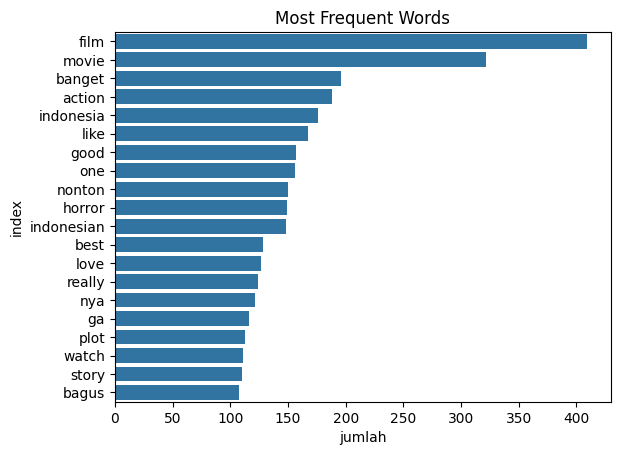

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Most Frequent Words')
plt.show()

Saya lalu mengubah teks ulasan menjadi representasi numerik TF-IDF, kemudian menghitung total bobot TF-IDF untuk setiap kata, dan mengambil 20 kata dengan bobot tertinggi. Kata-kata ini kemudian saya visualisasikan dalam bar plot horizontal, yang menunjukkan bahwa "film" dan "movie" memiliki frekuensi tertinggi, diikuti oleh "banget" dan "action," mengindikasikan topik utama ulasan.

# Feature Extraction & Modelling


In [28]:
X = df['text_akhir']
y = df['sentiment_label']

Pada langkah ini, saya menyiapkan data untuk pemodelan. Saya menetapkan kolom 'text_akhir' (yang berisi teks ulasan yang sudah bersih) sebagai variabel independen atau fitur (X), dan kolom 'sentiment_label' (yang berisi label sentimen positif, negatif, atau netral) sebagai variabel dependen atau target (y).

# Feature Extraction


In [29]:
tfidf = TfidfVectorizer(max_features=7000, min_df=10, max_df=0.7, ngram_range=(1,1))
X_tfidf = tfidf.fit_transform(X)

Selanjutnya, saya menginisialisasi TfidfVectorizer dengan parameter tertentu (maksimal 7000 fitur, kata minimal muncul 10 kali, maksimal di 70% dokumen, dan hanya unigram) untuk mengubah data teks X menjadi matriks fitur numerik X_tfidf berdasarkan bobot TF-IDF.

# Modelling with ML Algorithm

using Logistic Regression

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

Selanjutnya, untuk pemodelan dengan Regresi Logistik, saya membagi data fitur TF-IDF (X_tfidf) dan label sentimen (y) menjadi set pelatihan dan pengujian. Saya menggunakan fungsi train_test_split untuk memisahkan 20% data sebagai set pengujian (test_size=0.2) dan menyetel random_state=42 agar pembagian data tetap sama setiap kali kode dijalankan.

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score

clf = LogisticRegression(max_iter=1000, C=10, solver='saga', multi_class='multinomial')
clf.fit(X_train, y_train)

print("Test Accuracy before using GridSearchCV:", clf.score(X_test, y_test))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Test Accuracy before using GridSearchCV: 0.8105219893136046


Pada tahap ini, saya mengimpor LogisticRegression dari sklearn.linear_model serta accuracy_score dan precision_score dari sklearn.metrics. Kemudian, saya menginisialisasi model Regresi Logistik (clf) dengan beberapa parameter seperti max_iter=1000, C=10, solver='saga', dan multi_class='multinomial'. Model ini lalu saya latih (clf.fit) menggunakan data latih (X_train, y_train). Terakhir, saya mencetak akurasi model pada data uji (X_test, y_test) sebelum melakukan penyetelan hyperparameter dengan GridSearchCV.

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(max_iter=1000, solver='saga', multi_class='multinomial'))
])

param_grid = {
    'tfidf__max_features': [3000, 5000, 7000],
    'tfidf__min_df': [5, 10, 15, 17],
    'tfidf__max_df': [0.7, 0.8],
    'tfidf__ngram_range': [(1,1), (1,2)],
    'clf__C': [0.1, 1, 10]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X, y)

print("Best parameters:")
print(grid_search.best_params_)

print("\nBest cross-validation accuracy:")
print(grid_search.best_score_)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_pred = grid_search.best_estimator_.predict(X_test)

print("\nTest Accuracy after using GridSearchCV:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 144 candidates, totalling 432 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Best parameters:
{'clf__C': 10, 'tfidf__max_df': 0.7, 'tfidf__max_features': 3000, 'tfidf__min_df': 5, 'tfidf__ngram_range': (1, 1)}

Best cross-validation accuracy:
0.7502671598849157

Test Accuracy after using GridSearchCV: 0.9502671598849157

Classification Report:
              precision    recall  f1-score   support

    negative       0.94      0.90      0.92       559
     neutral       0.95      0.97      0.96       754
    positive       0.96      0.96      0.96      1120

    accuracy                           0.95      2433
   macro avg       0.95      0.94      0.95      2433
weighted avg       0.95      0.95      0.95      2433



Untuk optimasi model Regresi Logistik, saya menggunakan Pipeline (menggabungkan TF-IDF dan model) dan GridSearchCV untuk mencari kombinasi hyperparameter terbaik dari param_grid yang telah ditentukan. Hasilnya, ditemukan parameter optimal ('clf__C': 10, 'tfidf__max_features': 3000, dll.) yang meningkatkan akurasi validasi silang menjadi sekitar 0.75 dan akurasi pada data uji menjadi sekitar 0.95, dengan presisi, recall, dan f1-score yang baik untuk semua kelas sentimen.

# Modelling with Deep Learning Algorithm

using LSTM



In [33]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

df['text_joined'] = df['text_tokenizingText'].apply(lambda x: ' '.join(x))

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['text_joined'])

sequences = tokenizer.texts_to_sequences(df['text_joined'])
X_padded = pad_sequences(sequences, maxlen=100)
vocab_size = len(tokenizer.word_index) + 1

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
if 'numeric_rating' not in df.columns:
    df['numeric_rating'] = df['rating'].apply(convert_rating)  # Assuming 'convert_rating' function is defined
    df['numeric_rating'] = df['numeric_rating'].fillna(df['numeric_rating'].median())

numeric_feature = scaler.fit_transform(df[['numeric_rating']])

Untuk persiapan model LSTM, saya menggabungkan token teks menjadi kalimat, lalu menggunakan Tokenizer Keras untuk mengubah teks menjadi urutan integer yang dipadatkan menjadi panjang seragam 100, dan menentukan ukuran kosakata. Selain itu, saya menskalakan fitur 'numeric_rating' menggunakan MinMaxScaler setelah memastikan tidak ada nilai yang hilang.

In [34]:
from keras.models import Model
from keras.layers import Input, Embedding, LSTM, Dense, Concatenate, Dropout, BatchNormalization

input_text = Input(shape=(100,))
embedding = Embedding(input_dim=vocab_size, output_dim=100, input_length=100)(input_text)
lstm_out = LSTM(128)(embedding)

input_numeric = Input(shape=(1,))

concat = Concatenate()([lstm_out, input_numeric])

dense = Dense(64, activation='relu')(concat)
output = Dense(3, activation='softmax')(dense)

model = Model(inputs=[input_text, input_numeric], outputs=output)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 100, 100)  │  3,966,600 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 128)       │    117,248 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 129)       │          0 │ lstm[0][0],       │
│ (Concatenate)       │                   │            │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64)        │      8,320 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 3)         │        195 │ dense[0][0]       │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 4,092,363 (15.61 MB)

 Trainable params: 4,092,363 (15.61 MB)

 Non-trainable params: 0 (0.00 B)

Kemudian, saya membangun model LSTM dengan dua input: satu untuk teks (melewati lapisan Embedding dan LSTM) dan satu untuk fitur rating numerik. Output keduanya digabungkan, lalu diproses oleh lapisan Dense sebelum menghasilkan prediksi sentimen 3 kelas menggunakan aktivasi softmax. Model ini saya kompilasi dengan loss categorical_crossentropy dan optimizer adam, lalu ringkasan arsitekturnya saya tampilkan.

In [35]:
from keras.utils import to_categorical

label_map = {'positive': 0, 'neutral': 1, 'negative': 2}
df['label_encoded'] = df['sentiment_label'].map(label_map)
y = to_categorical(df['label_encoded'])

X_text_train, X_text_test, X_num_train, X_num_test, y_train, y_test = train_test_split(
    X_padded, numeric_feature, y, test_size=0.2, random_state=42
)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.85):
      print("\nAkurasi Validasi telah mencapai >85%!")
      self.model.stop_training = True
callbacks = myCallback()

model.fit([X_text_train, X_num_train], y_train, epochs=5, batch_size=64, validation_data=([X_text_test, X_num_test], y_test), callbacks = [callbacks])

Epoch 1/5
153/153 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.5681 - loss: 0.9281 - val_accuracy: 0.6757 - val_loss: 0.7038
Epoch 2/5
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8012 - loss: 0.5024 - val_accuracy: 0.7891 - val_loss: 0.5518
Epoch 3/5
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9353 - loss: 0.2065 - val_accuracy: 0.8072 - val_loss: 0.5428
Epoch 4/5
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9697 - loss: 0.1063 - val_accuracy: 0.7768 - val_loss: 0.6579
Epoch 5/5
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9796 - loss: 0.0801 - val_accuracy: 0.7990 - val_loss: 0.7424


Saya meng-encode label sentimen menjadi format numerik dan one-hot, lalu membagi data fitur (teks yang dipadatkan dan fitur numerik) serta label menjadi set pelatihan/pengujian. Kemudian, saya melatih model LSTM selama 5 epoch dengan callback untuk berhenti jika akurasi validasi >0.85. Output menunjukkan pelatihan berjalan selama 5 epoch, dengan akurasi validasi tertinggi 0.8072 (Epoch 3), yang tidak memicu penghentian oleh callback.

In [36]:
loss, accuracy = model.evaluate([X_text_test, X_num_test], y_test)
print(f"Akurasi Validasi: {accuracy:.2%}")

77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8002 - loss: 0.7278
Akurasi Validasi: 79.90%


Setelah pelatihan model LSTM selesai, saya mengevaluasi kinerjanya pada data uji (X_text_test dan X_num_test untuk fitur, serta y_test untuk label) menggunakan model.evaluate(). Hasil evaluasi, yaitu nilai loss dan akurasi, kemudian saya cetak. Output menunjukkan bahwa akurasi validasi model LSTM pada data uji adalah 79.41%.

# Modelling with Pre-trained Model

using BERT



In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    df['text_akhir'], df['label_encoded'], test_size=0.2, random_state=42
)

from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def encode_texts(texts, max_len=128):
    return tokenizer(
        texts.tolist(),
        truncation=True,
        padding='max_length',
        max_length=max_len,
        return_tensors='tf'
    )

train_encodings = encode_texts(X_train)
test_encodings = encode_texts(X_test)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Untuk pemodelan BERT, saya pertama-tama membagi data 'text_akhir' dan 'label_encoded' menjadi set latih/uji. Kemudian, saya memuat BertTokenizer pra-terlatih dan membuat fungsi encode_texts untuk melakukan tokenisasi, padding/truncation menjadi panjang 128, dan konversi ke tensor TensorFlow. Fungsi ini saya terapkan untuk menghasilkan train_encodings dan test_encodings.

In [38]:
import tensorflow as tf

def create_dataset(encodings, labels):
    return tf.data.Dataset.from_tensor_slices((
        dict(encodings),
        labels
    )).batch(16)

train_dataset = create_dataset(train_encodings, y_train)
test_dataset = create_dataset(test_encodings, y_test)

Lalu, saya membuat fungsi create_dataset untuk mengubah encodings dan label menjadi tf.data.Dataset dengan batch size 16 sample, yang kemudian saya terapkan untuk membuat train_dataset dan test_dataset untuk model BERT.



In [39]:
from transformers import TFBertForSequenceClassification, create_optimizer
from tensorflow.keras.optimizers import Adam

model = TFBertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=3
)

num_train_steps = len(train_dataset) * 3
optimizer, lr_schedule = create_optimizer(
    init_lr=2e-5,
    num_warmup_steps=0,
    num_train_steps=num_train_steps
)

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

history = model.fit(
    train_dataset,
    epochs=3,
    validation_data=test_dataset
)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
609/609 [==============================] - 323s 438ms/step - loss: 0.5034 - accuracy: 0.8021 - val_loss: 0.3140 - val_accuracy: 0.8878
Epoch 2/3
609/609 [==============================] - 264s 433ms/step - loss: 0.2335 - accuracy: 0.9224 - val_loss: 0.2941 - val_accuracy: 0.9059
Epoch 3/3
609/609 [==============================] - 263s 432ms/step - loss: 0.1403 - accuracy: 0.9596 - val_loss: 0.3200 - val_accuracy: 0.9071


Saya memuat pre-trained model BERT untuk 3 kelas, menyiapkan optimizer, dan mengompilasinya. Kemudian, saya melatih model selama 3 epoch. Output menunjukkan peringatan inisialisasi ulang weight dan akurasi validasi meningkat dari sekitar 0.8878 (Epoch 1) menjadi 0.9071 (Epoch 3).

In [40]:
results = model.evaluate(test_dataset)
print(f"Akurasi: {results[1]:.2%}")

153/153 [==============================] - 22s 145ms/step - loss: 0.3200 - accuracy: 0.9071
Akurasi: 90.71%


Setelah model BERT selesai dilatih, saya mengevaluasi kinerjanya pada test_dataset menggunakan model.evaluate(). Hasilnya kemudian saya cetak, yang menunjukkan bahwa akurasi model pada data uji adalah 90.71%.

# Prediction

In [49]:
sample_text = input('Masukkan teks (dalam Bahasa Indonesia atau Inggris): ')
inputs = tokenizer(sample_text, return_tensors='tf')
outputs = model(inputs)
predicted_class = tf.argmax(outputs.logits, axis=1).numpy()[0]

print(f"Prediksi: {list(label_map.keys())[predicted_class]}")

Masukkan teks (dalam Bahasa Indonesia atau Inggris): one of the greatest fight scene i've ever seen!
Prediksi: positive


Pada langkah akhir ini, saya meminta input teks dari pengguna, lalu menggunakan tokenizer BERT untuk mengubahnya menjadi format yang sesuai. Model BERT yang sudah dilatih kemudian digunakan untuk memprediksi sentimen dari teks tersebut, dan label sentimen yang paling mungkin (positif, netral, atau negatif) dicetak sebagai hasil prediksi.

# Export Requirement

In [42]:
!pip freeze > requirements.txt